#**Sujet :** Impact de l'IA sur le marché de l'emploi (2024-2030)


**Description :**

Ce projet explore l'impact croissant de l'adoption de l'Intelligence Artificielle (IA) sur le marché du travail mondial. Il examine en détail comment cette technologie transforme les métiers, en se concentrant sur les métiers en augmentation ou en diminution en raison de l'IA, les compétences requises et leur évolution face à l'automatisation..





> Data Source :https://www.kaggle.com/datasets/sahilislam007/ai-impact-on-job-market-20242030/code

# **Phase 1 — Business Understanding**

| BO  |   DSO (one precise objective) | Type  | Model examples     |
| --- | ------------------------- | -------------- | ------------------------ |
| **BO1: Aide les entreprises à anticiper les métiers à recruter et adapter leurs plans RH et formation** | Classifier des métiers selon trajectoire 2024→2030(croissance / stable / déclin). | Classification | Random Forest, XGBoost, Logistic Regression |
| **BO2: Permet aux professionnels et aux entreprises de planifier la reconversion et les formations adaptées** | Estimer le % de risque d’automatisation pour chaque métier. | Regression | Gradient Boosting Regressor , Random Forest Regressor|
| **BO3: Aligner les programmes éducatifs sur les besoins futurs du marché du travail** |Regrouper métiers selon signaux de marché pour aligner programmes éducatifs.Identifier des groupes homogènes de métiers selon :le niveau de salaire,le risque d’automatisation,les compétences requises (niveau d’éducation, impact IA),et les dynamiques du marché (offres 2024 → 2030). | Clustering |   K-Means on TF-IDF, HDBSCAN |
| **BO4: Aider les multinationales à choisir les implantations pour le recrutement et l’investissement** | Prévoir le nombre de postes ouverts par pays/secteur en 2030. | Regression | Linear Regression, Random Forest Regressor, XGBoost Regressor |
| **BO5: Permettre aux candidats et aux entreprises de prioriser les métiers stables et rémunérateurs** | Classer la stabilité d’un métier (stable vs à risque de déclin). | Classification | Logistic Regression, Random Forest, XGBoost|
| **BO6: Aider les entreprises à planifier le télétravail et les politiques RH flexibles** | Estimer faisabilité et impact du télétravail par métier  | Classification | Logistic Regression , Random Forest |




# **Phase 2 — Data Understanding**

**IMPORT DES LIBRAIRIES ET CHARGEMENT DES DONNÉES**




In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.inspection import permutation_importance


In [34]:
INPUT_CSV = "ai_job_trends_dataset.csv"    # adjust path if needed
OUTPUT_PREPARED_CSV = "prepared_data.csv"  # saved BEFORE PCA
OUTPUT_PCA_CSV = "dataset_reduit.csv"      # saved AFTER PCA
# Load the data
df = pd.read_csv("data/ai_job_trends_dataset.csv")

# DESCRIPTION -
print("Dimensions", df.shape)
df.head(5)

Dimensions (30000, 13)


Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342                  55.96   
1                 1243                       6205                  16.81   
2                 3338                       1154                  91.82   
3                 7173                       4060                   1.89   
4                 5944                       7396                  53.76   

   Automation Risk (%)   Location  Gender Diversity (%)  
0                28.28         UK                 44.63  
1                89.71        USA                 66.39  
2                72.97     Canada                 41.13  
3                99.94  Australia                 65.76  
4                37.65    Germany                 72.57

# **Analyse exploratoire**

In [51]:
print("Colonnes:", df.columns.tolist())
print(f"\nTypes de données:\n{df.dtypes}")

Colonnes: ['Job_Title', 'Industry', 'Job_Status', 'AI_Impact_Level', 'Median_Salary_USD', 'Required_Education', 'Experience_Required_Years', 'Job_Openings_2024', 'Projected_Openings_2030', 'Remote_Work_Ratio_%', 'Automation_Risk_%', 'Location', 'Gender_Diversity_%']

Types de données:
Job_Title                     object
Industry                      object
Job_Status                    object
AI_Impact_Level               object
Median_Salary_USD            float64
Required_Education            object
Experience_Required_Years      int64
Job_Openings_2024              int64
Projected_Openings_2030        int64
Remote_Work_Ratio_%          float64
Automation_Risk_%            float64
Location                      object
Gender_Diversity_%           float64
dtype: object


In [52]:
df.info()
# Affichez les statistiques descriptives des variables numériques.
print("\nStatistiques descriptives:\n")
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job_Title                  30000 non-null  object 
 1   Industry                   30000 non-null  object 
 2   Job_Status                 30000 non-null  object 
 3   AI_Impact_Level            30000 non-null  object 
 4   Median_Salary_USD          30000 non-null  float64
 5   Required_Education         30000 non-null  object 
 6   Experience_Required_Years  30000 non-null  int64  
 7   Job_Openings_2024          30000 non-null  int64  
 8   Projected_Openings_2030    30000 non-null  int64  
 9   Remote_Work_Ratio_%        30000 non-null  float64
 10  Automation_Risk_%          30000 non-null  float64
 11  Location                   30000 non-null  object 
 12  Gender_Diversity_%         30000 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usag

count unique                  top   freq  \
Job_Title                    30000    639  Surveyor, insurance     75   
Industry                     30000      8        Entertainment   3895   
Job_Status                   30000      2           Increasing  15136   
AI_Impact_Level              30000      3             Moderate  10042   
Median_Salary_USD          30000.0    NaN                  NaN    NaN   
Required_Education           30000      5    Bachelor’s Degree   6146   
Experience_Required_Years  30000.0    NaN                  NaN    NaN   
Job_Openings_2024          30000.0    NaN                  NaN    NaN   
Projected_Openings_2030    30000.0    NaN                  NaN    NaN   
Remote_Work_Ratio_%        30000.0    NaN                  NaN    NaN   
Automation_Risk_%          30000.0    NaN                  NaN    NaN   
Location                     30000      8            Australia   3802   
Gender_Diversity_%         30000.0    NaN                  NaN    NaN   

                                   mean           std       min         25%  \
Job_Title                           NaN           NaN       NaN         NaN   
Industry                            NaN           NaN       NaN         NaN   
Job_Status                          NaN           NaN       NaN         NaN   
AI_Impact_Level                     NaN           NaN       NaN         NaN   
Median_Salary_USD          90119.965639  34412.013953  30001.86  60500.7025   
Required_Education                  NaN           NaN       NaN         NaN   
Experience_Required_Years     10.051433      6.060678       0.0         5.0   
Job_Openings_2024           5039.640833   2861.009654     100.0      2570.0   
Projected_Openings_2030       5074.2181   2866.550722     100.0     2586.75   
Remote_Work_Ratio_%           49.836431     28.966688       0.0       24.57   
Automation_Risk_%             50.154229     28.754889       0.0        25.4   
Location                            NaN           NaN       NaN         NaN   
Gender_Diversity_%             49.97966     17.274665      20.0       35.07   

                                 50%        75%       max  
Job_Title                        NaN        NaN       NaN  
Industry                         NaN        NaN       NaN  
Job_Status                       NaN        NaN       NaN  
AI_Impact_Level                  NaN        NaN       NaN  
Median_Salary_USD          90274.115  119454.71  149998.5  
Required_Education               NaN        NaN       NaN  
Experience_Required_Years       10.0       15.0      20.0  
Job_Openings_2024             5034.0     7527.0   10000.0  
Projected_Openings_2030       5106.5     7573.0   10000.0  
Remote_Work_Ratio_%            49.57       75.1     100.0  
Automation_Risk_%              50.02      75.03     99.99  
Location                         NaN        NaN       NaN  
Gender_Diversity_%            49.885      64.91      80.0

**Interprétation**
> -L’EDA montre un jeu de données de 30 000 lignes et 13 colonnes décrivant différents emplois. 

>-Les valeurs sont uniformes et équilibrées, suggérant des données synthétiques.

>-Aucune valeur manquante n’est détectée
>-Pas d'anomalies évidentes comme des valeurs négatives inappropriées (ex. : salaires min > 30 000 USD, expériences min = 0 ans).

Variables :

    Catégorielles (6) : Job Title, Industry, Job Status, AI Impact Level, Required Education, Location.

    Numériques (7) : Median Salary (USD), Experience Required (Years), Job Openings (2024), Projected Openings (2030), Remote Work Ratio (%), Automation Risk (%), Gender Diversity (%).

**Répartition et distributions**

In [53]:
df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]

# Pourcentage entre 0 et 100
percent_cols = ["Remote_Work_Ratio_%","Automation_Risk_%","Gender_Diversity_%"]
for col in percent_cols:
    df[col] = df[col].clip(lower=0, upper=100)

num_cols = df.select_dtypes(include=[np.number]).columns
# Aucune valeur négative dans les colonnes numériques
for col in num_cols:
    if (df[col] < 0).any():
        print(f"⚠️ Valeurs négatives détectées dans {col}")
# Standardiser les noms de colonnes
df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]

In [54]:
quantitative_cols = df.select_dtypes(include=[np.number]).columns

qualitative_cols = df.select_dtypes(include=['object']).columns


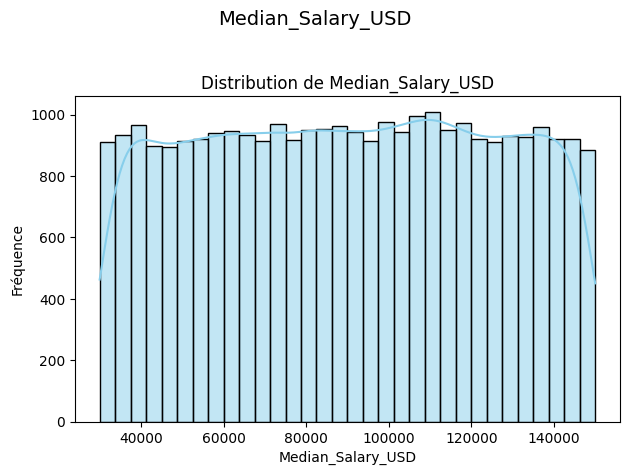

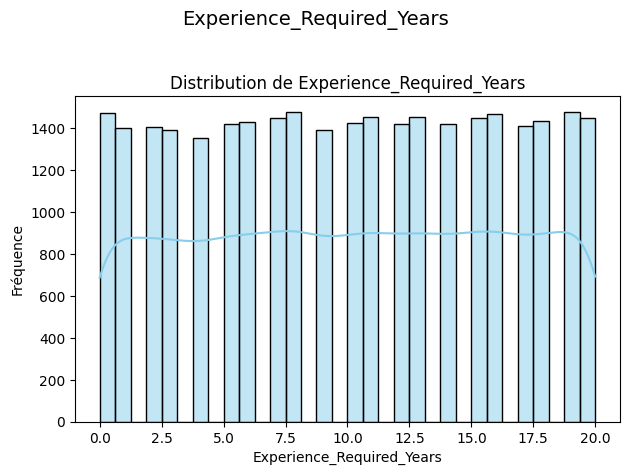

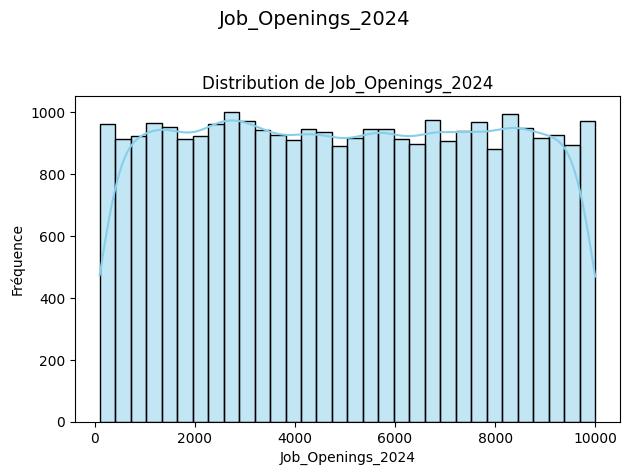

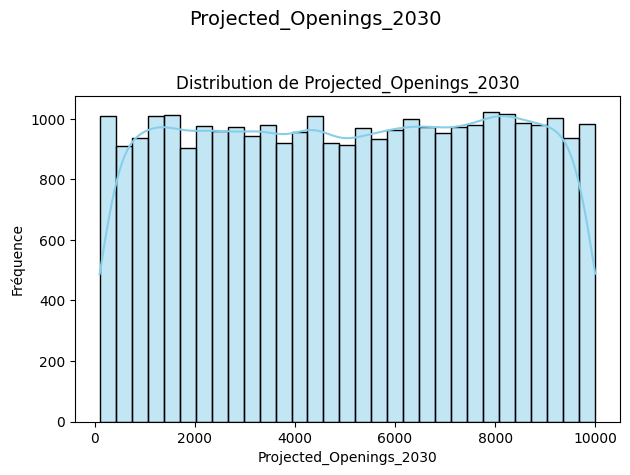

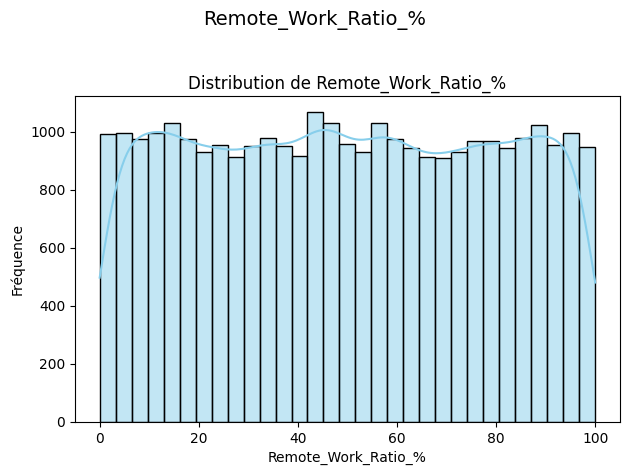

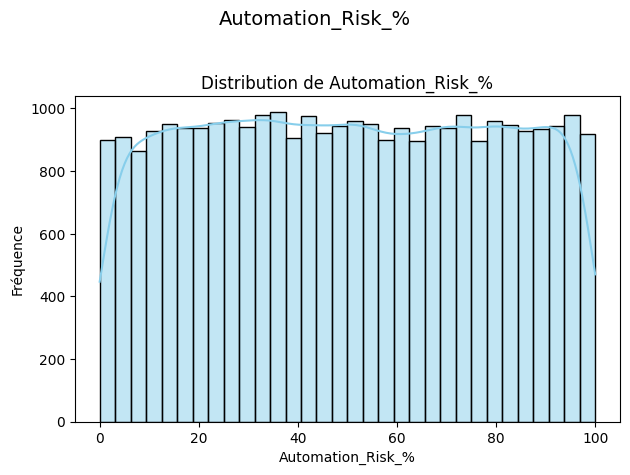

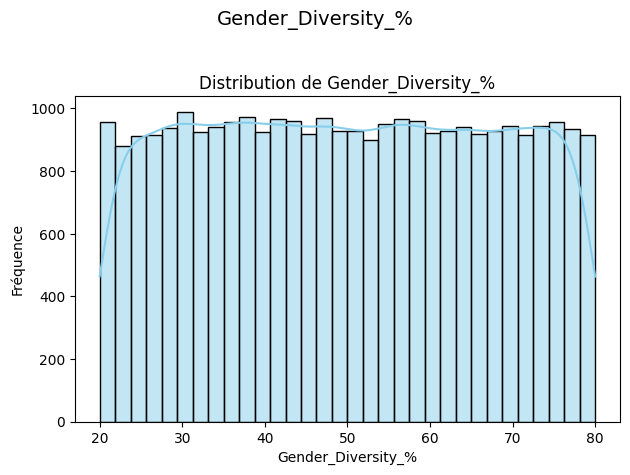

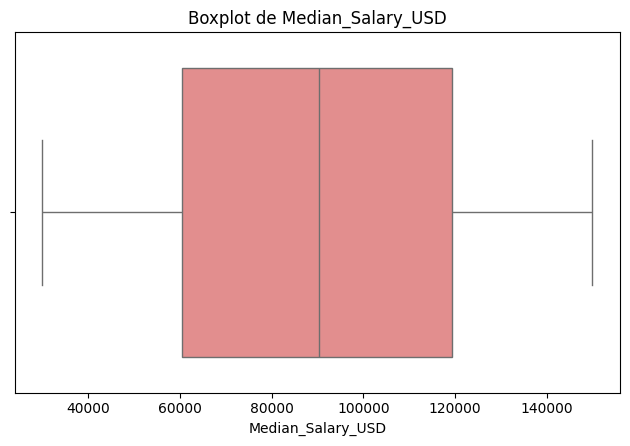

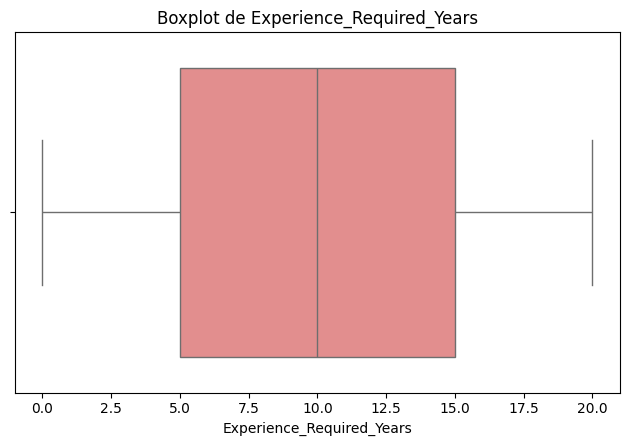

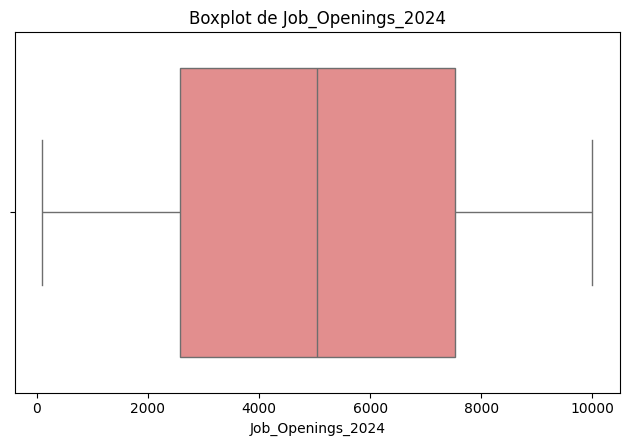

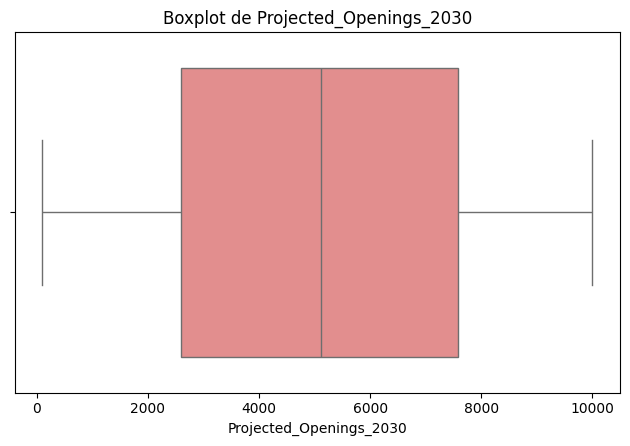

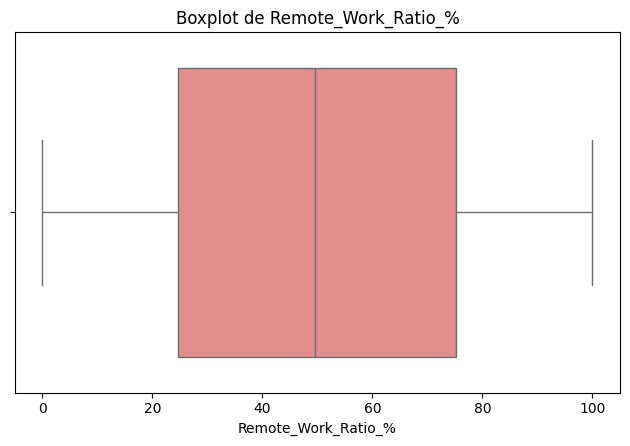

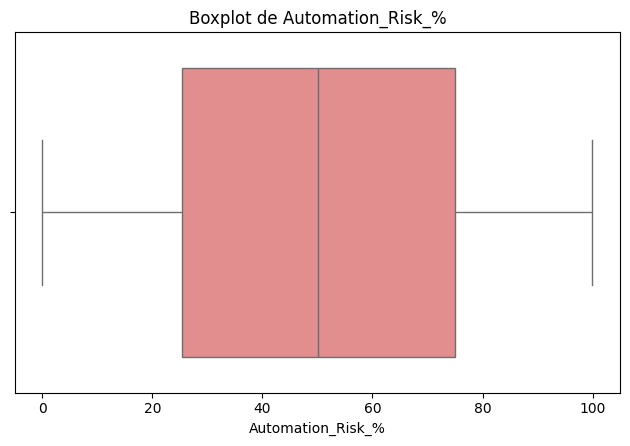

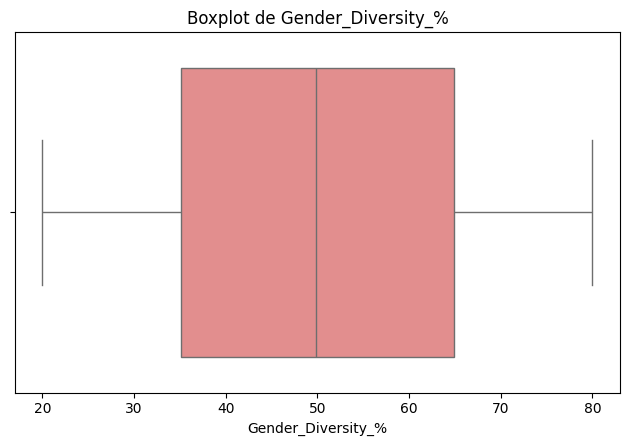

In [55]:
# Histogrammes + Boxplots pour variables numériques 
for col in quantitative_cols:
    plt.figure()
    plt.suptitle(f"{col}", fontsize=14)
    # Histogramme
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()
for col in quantitative_cols:
    # Boxplot
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot de {col}")

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

Les visuels (histogrammes avec KDE + boxplots) illustrent la distribution des variables numériques du dataset (30k entrées synthétiques) sur l'impact de l'IA sur le marché de l'emploi. Voici une interprétation concise par variable, basée sur les courbes et boîtes fournies.

Median Salary (USD) : Distribution uniforme 40k-140k, pics ~60k/90k/120k, boîte 80k-100k, dispersion modérée (écart-type ~34k).

Experience Required (Years) : Uniforme 0-20, boîte 5-15, moyenne/médiane ~10, symétrique.

Job Openings (2024) : Uniforme 0-10k, boîte 2.5k-7.5k, moyenne ~5k, légère croissance projetée.

Projected Openings (2030) : Similaire à 2024, légère hausse (~5.1k), stabilité marché.

Remote Work Ratio (%) : Uniforme 0-100%, médiane ~50%, dispersion totale, télétravail équilibré.

Automation Risk (%) : Uniforme 0-100%, médiane ~50%, impact IA modéré, distribution symétrique.

Gender Diversity (%) : Uniforme 20-80%, médiane ~50%, dispersion modérée, parité globale.

Insights globaux : Distributions synthétiques, centrées, peu d’outliers.



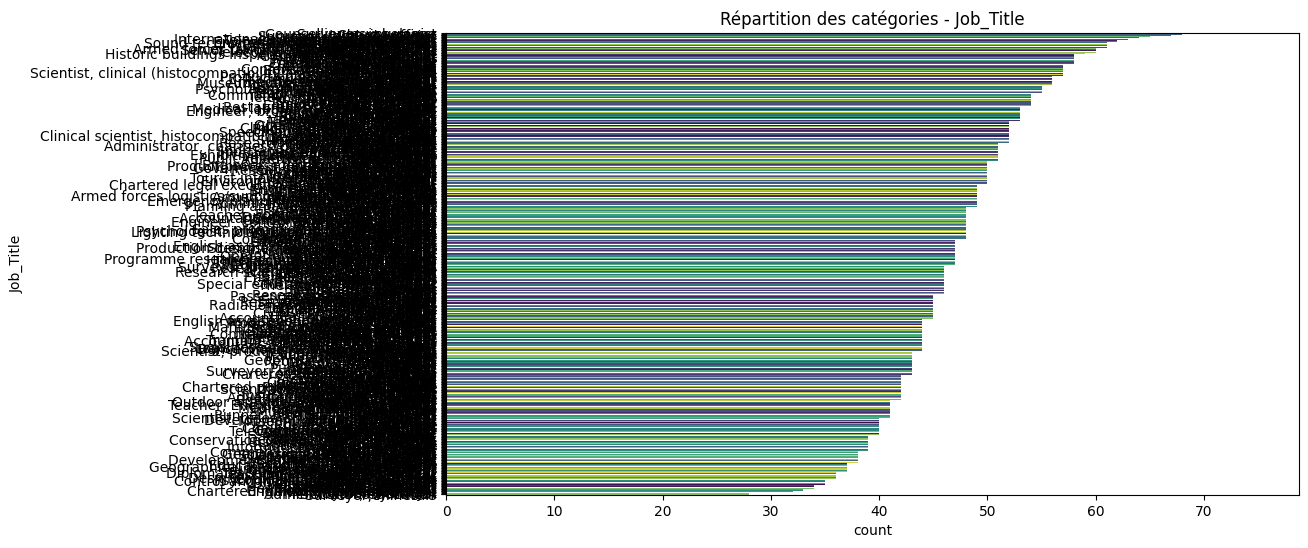

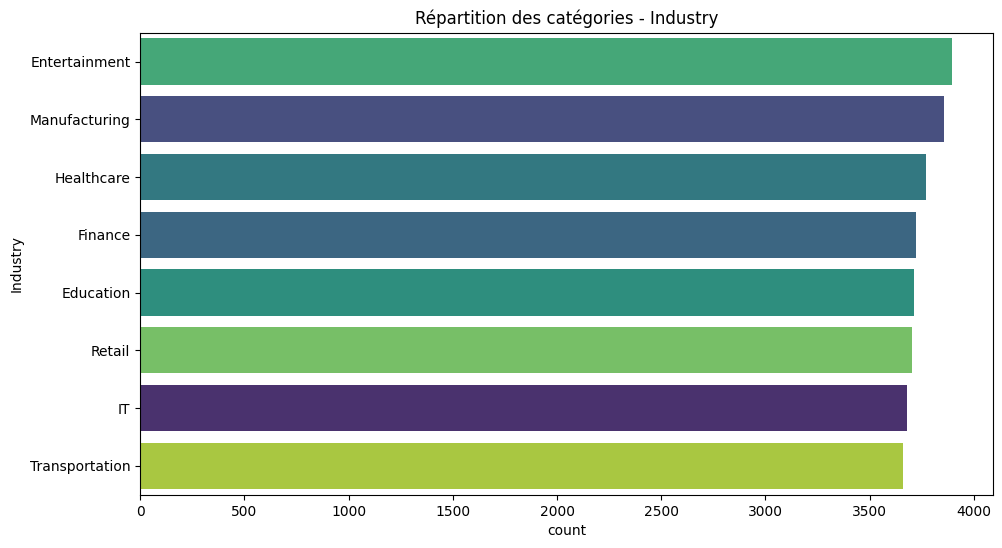

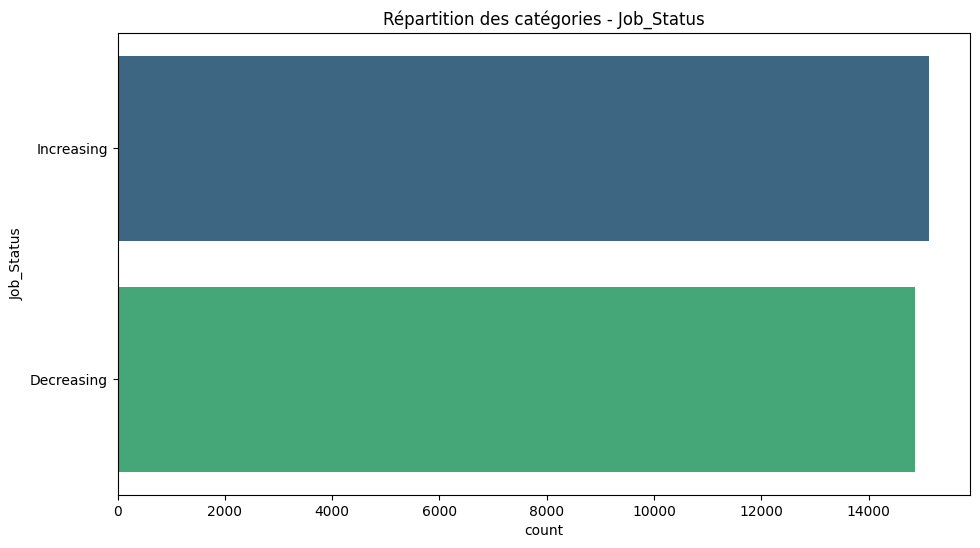

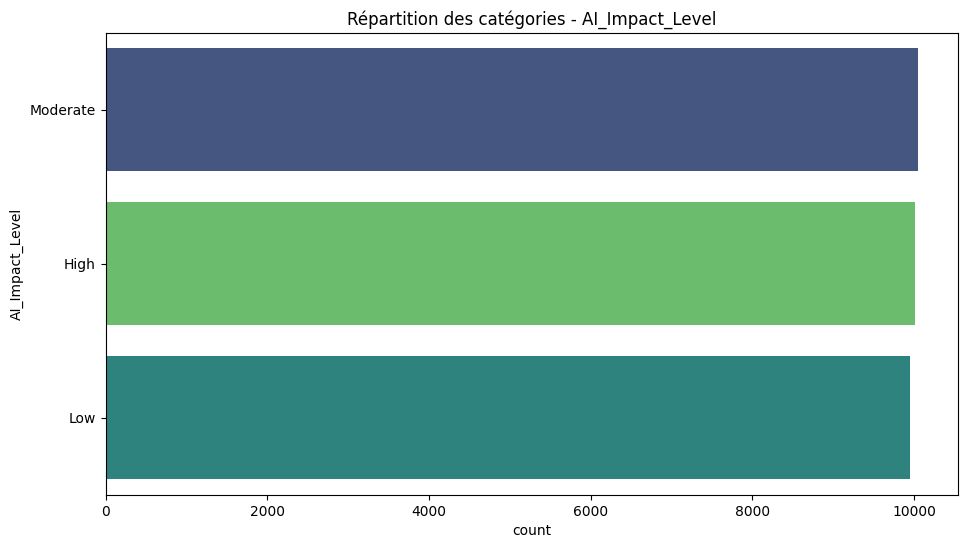

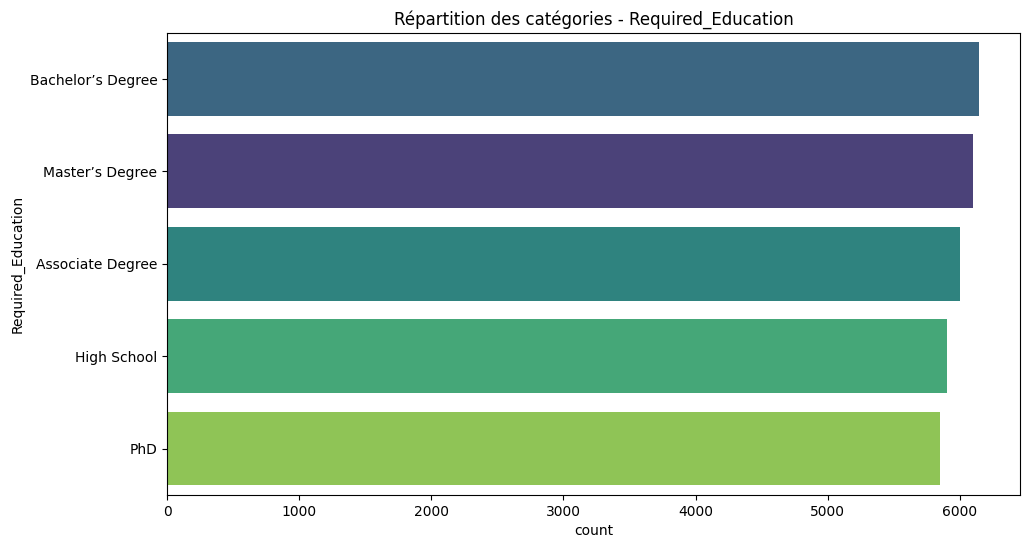

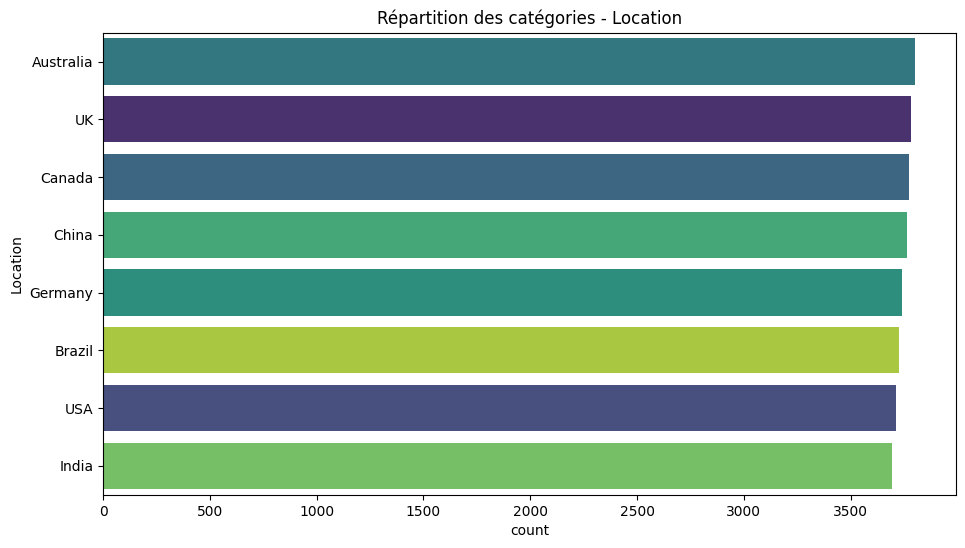

In [56]:
# Barplots pour variables catégorielles 
for col in qualitative_cols:
    plt.figure(figsize=(11,6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col],palette="viridis")
    plt.title(f"Répartition des catégories - {col}")
    plt.show()

Les barplots illustrent la répartition des variables catégorielles (Job Title, Industry, Job Status, AI Impact Level, Required Education, Location) sur un dataset de 30k entrées synthétiques. Chaque graphique montre des comptages par catégorie, avec une palette "viridis" pour différencier les valeurs. Voici une interprétation concise par variable.

Job Title : 639 titres, dominance légère de quelques professions (~70), forte diversité. Queue longue, synthétique.

Industry : 8 secteurs, counts ~3.5k-4k chacun, équilibré (~12.5%/secteur).

Job Status : 2 catégories, 50/50 parfait, artificiel, moitié croissance/moitié déclin.

AI Impact Level : 3 catégories, ~33% chacune, synthétique, impact modéré prédominant.

Required Education : 5 niveaux, ~20% chacun, "Bachelor’s" et "Master’s" fréquents, aligné salaires moyens.

Location : 8 pays, ~12.5% chacun, répartition équilibrée, "Australia" et "UK" en tête.

Insights globaux : Distributions uniformes, synthétiques. Diversité métiers et régions, impact IA moyen, éducation variée

**Qualité des données**

**Valeurs manquantes**

In [57]:
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
    'Valeurs manquantes': missing_count,
    '% manquantes': missing_pct.round(2)
})
display(missing_summary)

Valeurs manquantes  % manquantes
Job_Title                                   0           0.0
Industry                                    0           0.0
Job_Status                                  0           0.0
AI_Impact_Level                             0           0.0
Median_Salary_USD                           0           0.0
Required_Education                          0           0.0
Experience_Required_Years                   0           0.0
Job_Openings_2024                           0           0.0
Projected_Openings_2030                     0           0.0
Remote_Work_Ratio_%                         0           0.0
Automation_Risk_%                           0           0.0
Location                                    0           0.0
Gender_Diversity_%                          0           0.0

**Doublons et Valeurs uniques**

In [58]:
print("\nUnique values per column:")
print(df.nunique(dropna=False))

# Duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nLignes dupliquées: {duplicate_rows}")


Unique values per column:
Job_Title                      639
Industry                         8
Job_Status                       2
AI_Impact_Level                  3
Median_Salary_USD            29968
Required_Education               5
Experience_Required_Years       21
Job_Openings_2024             9439
Projected_Openings_2030       9410
Remote_Work_Ratio_%           9466
Automation_Risk_%             9519
Location                         8
Gender_Diversity_%            5965
dtype: int64

Lignes dupliquées: 0


In [59]:
print("\nTop 5 valeurs les plus fréquentes (catégorielles) :")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} :")
    print(df[col].value_counts(dropna=False).head())


Top 5 valeurs les plus fréquentes (catégorielles) :

Job_Title :
Job_Title
Surveyor, insurance         75
Counselling psychologist    70
Charity officer             68
Surveyor, land/geomatics    67
Hydrogeologist              66
Name: count, dtype: int64

Industry :
Industry
Entertainment    3895
Manufacturing    3855
Healthcare       3771
Finance          3721
Education        3714
Name: count, dtype: int64

Job_Status :
Job_Status
Increasing    15136
Decreasing    14864
Name: count, dtype: int64

AI_Impact_Level :
AI_Impact_Level
Moderate    10042
High        10005
Low          9953
Name: count, dtype: int64

Required_Education :
Required_Education
Bachelor’s Degree    6146
Master’s Degree      6097
Associate Degree     6003
High School          5900
PhD                  5854
Name: count, dtype: int64

Location :
Location
Australia    3802
UK           3784
Canada       3775
China        3763
Germany      3741
Name: count, dtype: int64


> Valeurs manquantes : 0 dans toutes les colonnes. Dataset complet, prêt à l’analyse. Limite : uniformité suspecte (synthétique).

Valeurs uniques : Titres 639, salaires ~30k, Industries 8, Locations 8. Insight : diversité métiers/lieux, mais granularité numérique élevée → possible génération aléatoire.

Doublons : 0. Chaque entrée unique, simplifie l’analyse, mais réalisme douteux.

Top fréquences catégories : Job_Title dispersion élevée, Industry/Location équilibrés (~12.5%), Job_Status 50/50, AI Impact ~33% chacun, Education ~20% chacun.

**VISUALISATIONS EXPLORATOIRES**

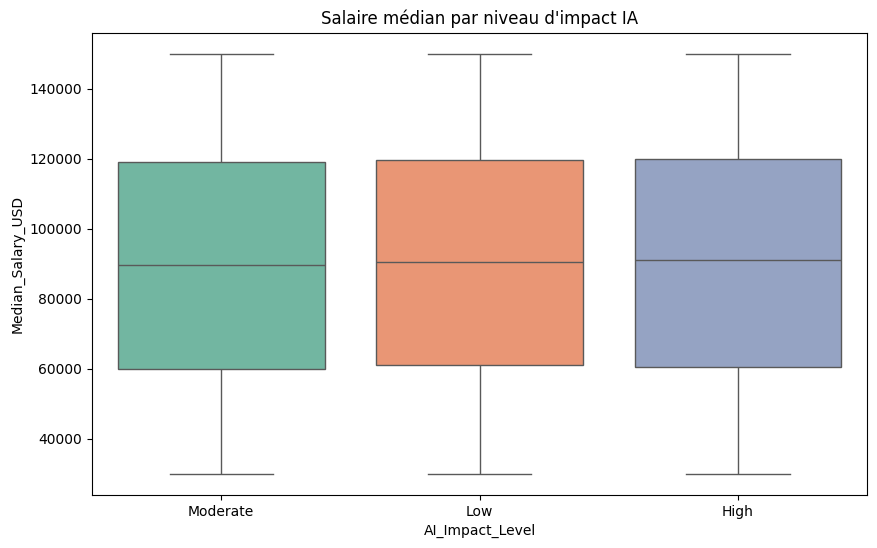

In [60]:
# Distribution des Niveaux d'Impact de l'IA
plt.figure(figsize=(10,6))
sns.boxplot(x='AI_Impact_Level', y='Median_Salary_USD', data=df, palette='Set2')
plt.title("Salaire médian par niveau d'impact IA")
plt.show()

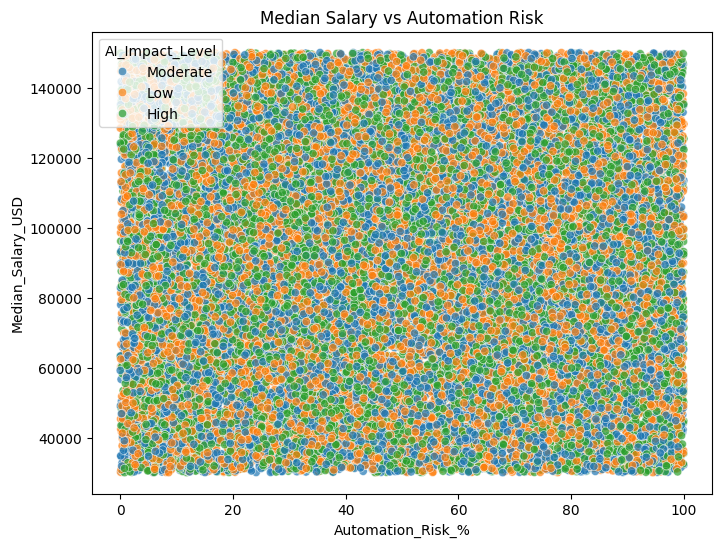

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Automation_Risk_%', y='Median_Salary_USD', hue='AI_Impact_Level', data=df, alpha=0.7)
plt.title("Median Salary vs Automation Risk")
plt.show()

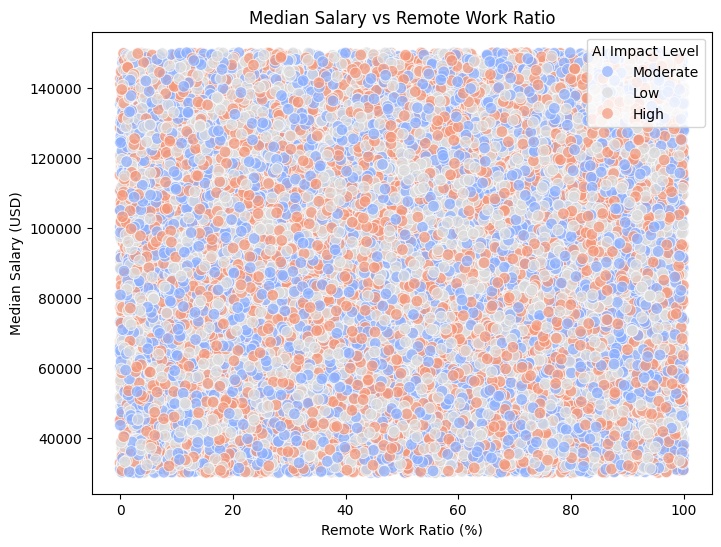

In [62]:
# Salaire vs Télétravail
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Remote_Work_Ratio_%",
    y="Median_Salary_USD",
    hue="AI_Impact_Level",
    palette="coolwarm",
    alpha=0.7, s=70
)
plt.title("Median Salary vs Remote Work Ratio")
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Median Salary (USD)")
plt.legend(title="AI Impact Level")
plt.show()

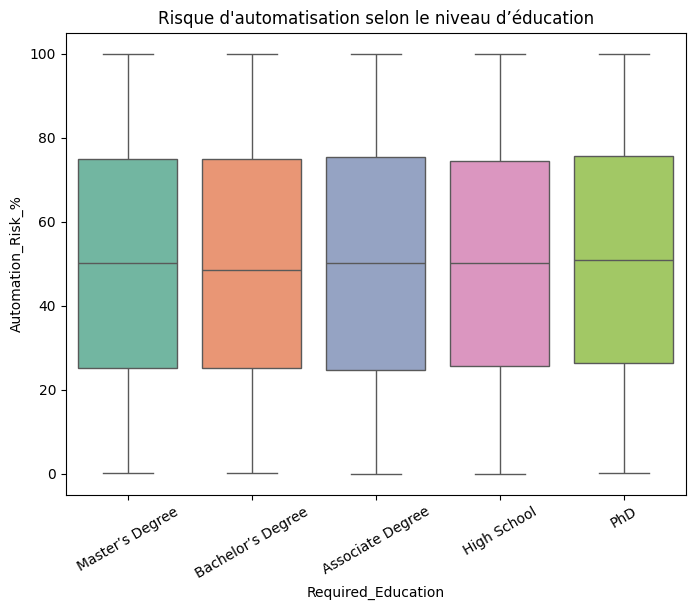

In [63]:
# Automatisation vs Éducation
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Required_Education",
    y="Automation_Risk_%",
    palette="Set2"
)
plt.xticks(rotation=30)
plt.title("Risque d'automatisation selon le niveau d’éducation")
plt.xlabel("Required_Education")
plt.ylabel("Automation_Risk_%")
plt.show()

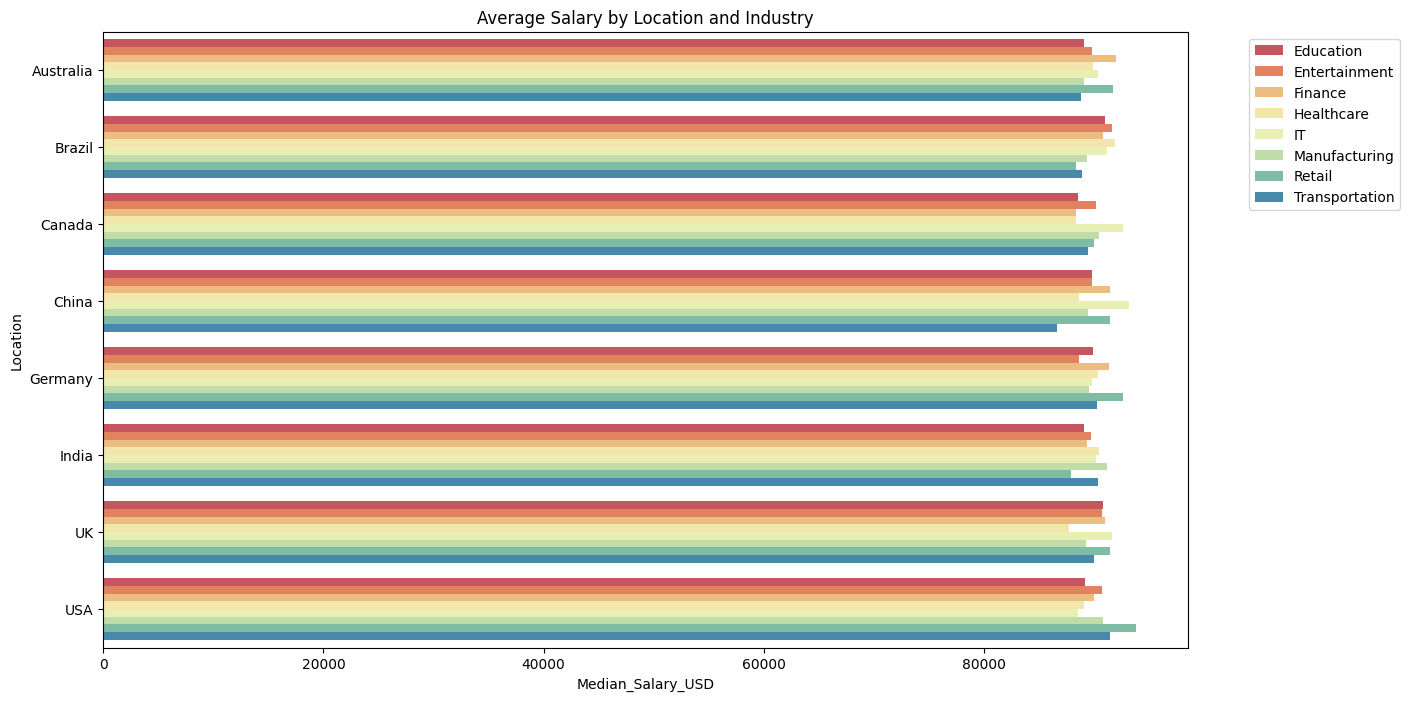

In [64]:
# Salaire moyen par pays et industrie
grouped = df.groupby(['Location', 'Industry'])['Median_Salary_USD'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='Median_Salary_USD', y='Location', hue='Industry', palette='Spectral')
plt.title("Average Salary by Location and Industry")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Matrice de corrélation**

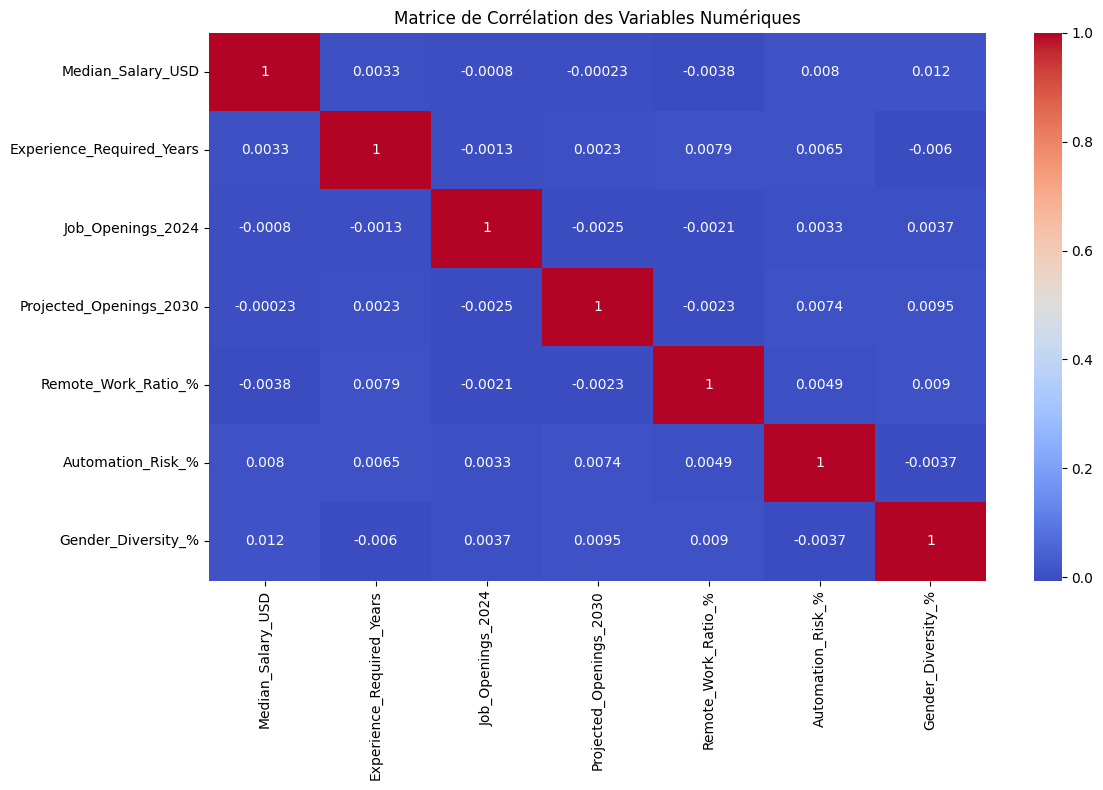

In [65]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[quantitative_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()


Les visualisations explorent les relations entre l'impact de l'IA, les salaires, le risque d'automatisation, le télétravail, l'éducation et les données géographiques/industrielles sur un dataset synthétique (30k entrées). Voici une interprétation concise de chaque graphique.

1. Boxplot : Salaire Médian par Niveau d'Impact IA
 Médianes ~90k USD, dispersion uniforme.
 Pas de différence nette de salaire selon l'impact IA (synthétique).

2. Scatterplot : Salaire Médian vs Risque d'Automatisation
 Nuage dense autour 50% risque/90k USD, aucune corrélation claire.
 Pas de tendance claire entre risque et salaire. 

3. Scatterplot : Salaire Médian vs Taux de Télétravail
 Télétravail ~50% moyen, pas d’effet sur les salaires.

4. Boxplot : Risque d'Automatisation vs Niveau d'Éducation
 Risque uniforme (~50%) quel que soit l'éducation. 

5. Barplot : Salaire Moyen par Pays et Industrie
 ~90k USD pour tous, petites variations Finance/IT.
 Salaires similaires (~90k), petites différences par région/sector.

6. Heatmap : Matrice de Corrélation
Faibles corrélations globales.

# **DATA PREPARATION - NETTOYAGE ET PRÉPARATION**



> Pas de valeurs manquantes, ni doublons.
  Les outliers numériques sont traités par IQR capping (on réduit leur influence sans les supprimer).

> Nettoie les noms de colonnes : supprime espaces et parenthèses → pas de KeyError.
> Supprime les colonnes redondantes
> Crée une nouvelle feature : 
     Job_Growth_Rate_% = taux de croissance des jobs entre 2024 et 2030.
> Encodage One-Hot pour toutes les variables catégorielles.

> Standardisation des colonnes numériques (moyenne 0, écart-type 1).

> Retourne un DataFrame prêt pour PCA ou ML, sans erreur de nom de colonne.


**Nettoyage des données**

In [24]:
#TRAITEMENT DES VALEURS MANQUANTES
df_clean = df.copy()

missing_before = df_clean.isnull().sum()
print(f"Valeurs manquantes avant traitement:\n{missing_before[missing_before > 0]}")

# Vérification et traitement des valeurs manquantes
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['float64', 'int64']:
            # Pour les numériques: médiane (plus robuste aux outliers)
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            # Pour les catégorielles: mode ou 'unknown'
            df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'unknown', inplace=True)

# Traitement des doublons
print(f"Doublons avant suppression: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Doublons après suppression: {df_clean.duplicated().sum()}")


Valeurs manquantes avant traitement:
Series([], dtype: int64)
Doublons avant suppression: 0
Doublons après suppression: 0


In [25]:
def outliers_iqr(df, cols=None):
    df2 = df.copy()
    for col in cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df2[col] = np.where(df2[col] < lower, lower, df2[col])
        df2[col] = np.where(df2[col] > upper, upper, df2[col])
    return df2
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df_clean = outliers_iqr(df_clean, cols=numeric_cols)
print("capped shape:", df_clean.shape)


capped shape: (30000, 13)


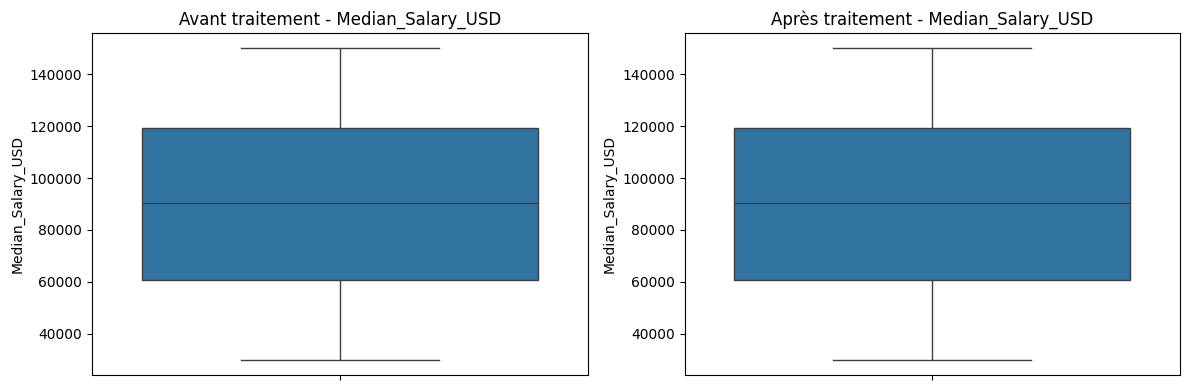

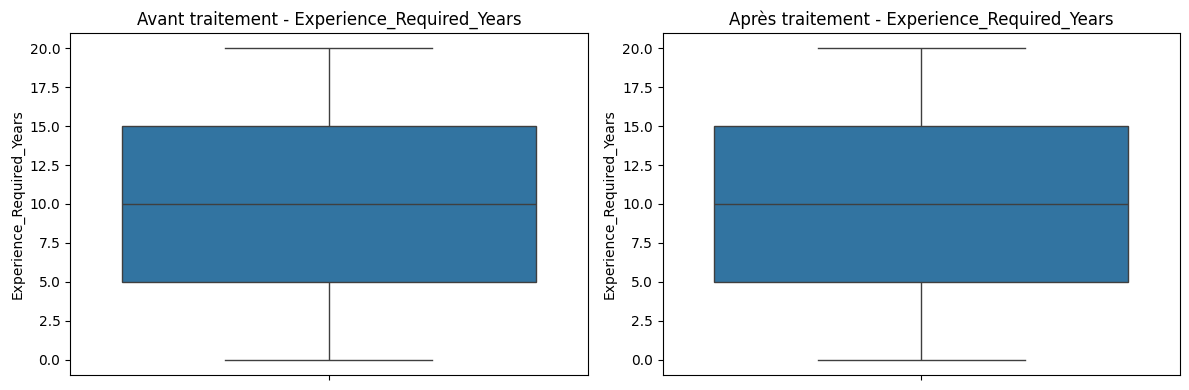

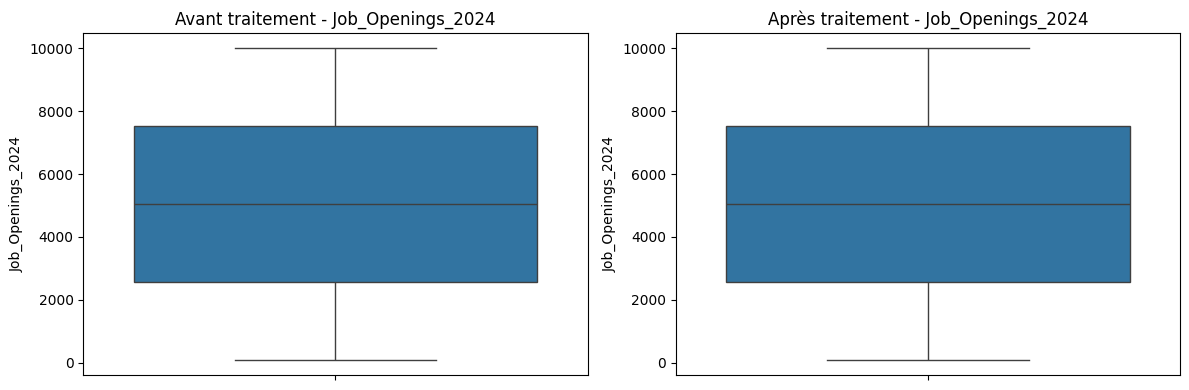

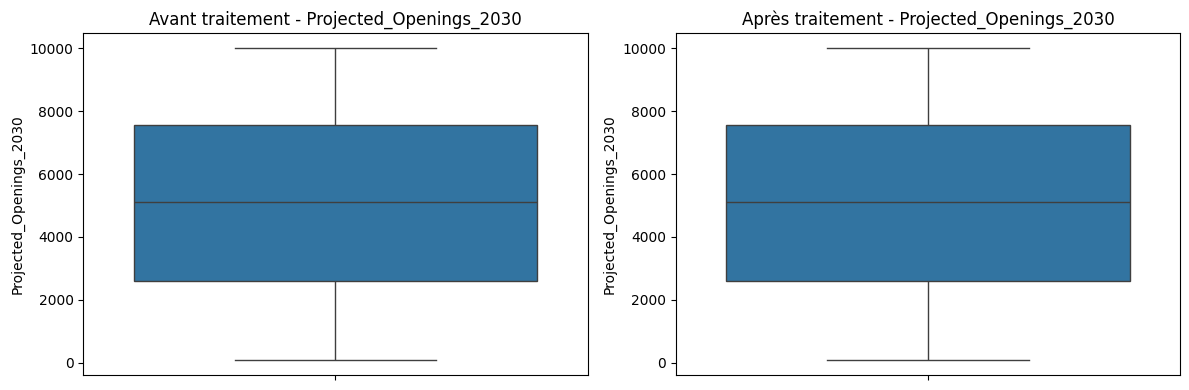

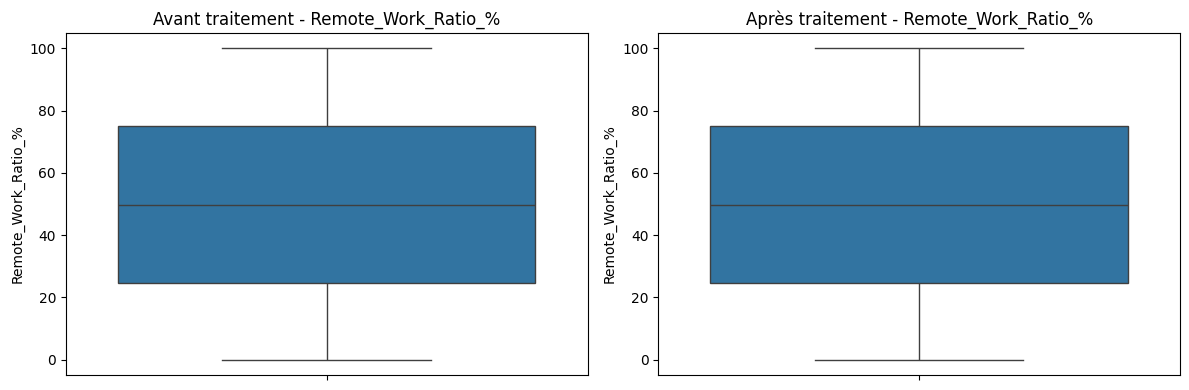

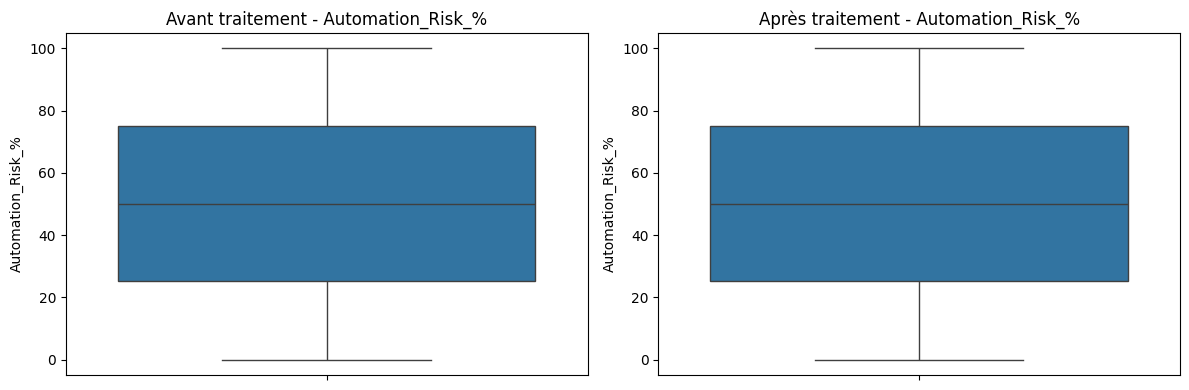

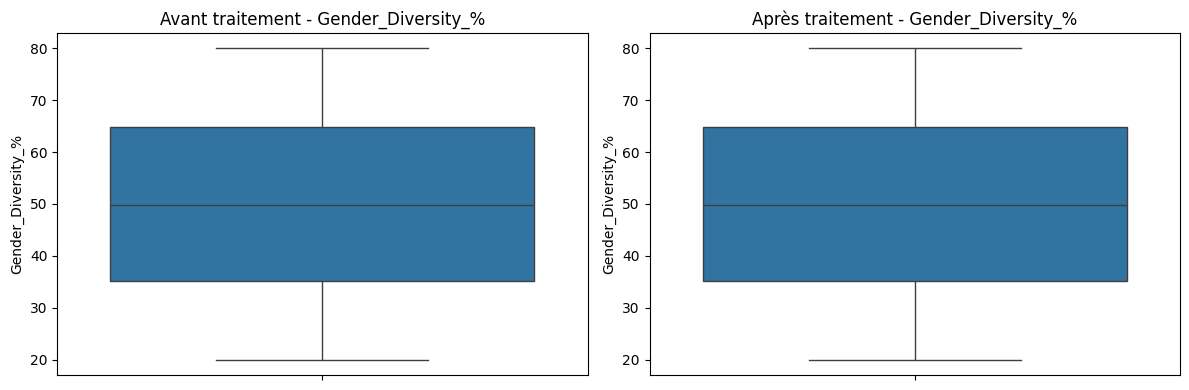

In [26]:
# Visualisation avant/après traitement des outliers
for col in numeric_cols :
    if col in df_clean.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        sns.boxplot(y=df[col], ax=ax1)
        ax1.set_title(f'Avant traitement - {col}')
        sns.boxplot(y=df_clean[col], ax=ax2)
        ax2.set_title(f'Après traitement - {col}')
        plt.tight_layout()
        plt.show()


**Feature engineering**

In [27]:
def feature_engineering(df):
    df_fe = df_clean.copy()

    # Growth metrics
    # Feature dérivée : croissance du nombre d’emplois 
    df_fe["Job_Growth_Rate_%"] = ((df_fe["Projected_Openings_2030"] - df_fe["Job_Openings_2024"]) 
                                / df_fe["Job_Openings_2024"]) * 100
    df_fe['Job_Growth_Rate_%'] = df_fe['Job_Growth_Rate_%'].fillna(0)

    # Suppression des colonnes redondantes
    df_fe.drop(columns=["Job_Openings_2024", "Projected_Openings_2030"], inplace=True)
   

    # Growth categories
    def classify_growth(g):
        if g < -10: return 'decline'
        elif g < 10: return 'stable'
        else: return 'high_growth'

    df_fe['Growth_Category'] = df_fe['Job_Growth_Rate_%'].apply(classify_growth)

    # Composite indices
    df_fe['Vulnerability_Index'] = (df_fe['Automation_Risk_%'] *
                                   (100 - df_fe['Remote_Work_Ratio_%']) / 100)
    # Job stability score
    df_fe['Job_Stability_Score'] = (100 - df_fe['Automation_Risk_%']) + df_fe['Job_Growth_Rate_%']
    num_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df_fe.select_dtypes(include=['object']).columns.tolist()

    print("Colonnes numériques :", num_cols)
    print("Colonnes catégorielles :", cat_cols)
    print(df_fe.shape)
    return df_fe
df_engineered = feature_engineering(df_clean)
df_engineered.to_csv('eng_data.csv', index=False)


Colonnes numériques : ['Median_Salary_USD', 'Experience_Required_Years', 'Remote_Work_Ratio_%', 'Automation_Risk_%', 'Gender_Diversity_%', 'Job_Growth_Rate_%', 'Vulnerability_Index', 'Job_Stability_Score']
Colonnes catégorielles : ['Job_Title', 'Industry', 'Job_Status', 'AI_Impact_Level', 'Required_Education', 'Location', 'Growth_Category']
(30000, 15)


**Data Transformation**

In [ ]:
from sklearn.compose import ColumnTransformer

def preprocess_pipeline(df):
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
    le = LabelEncoder()
    df_proc = df_clean.copy()
    df_proc.columns = df_proc.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
    # 1. ORDINAL ENCODING (variables with natural order)
    education_mapping = {"high school":1, "associate degree":2, "bachelor's degree":3,
                         "master's degree":4, "phd":5, "unknown":2}
    ai_impact_mapping = {"low": 1, "moderate": 2, "high": 3, "unknown": 0}
    job_status_mapping = {"decreasing": 0, "increasing": 1, "unknown": 0.5}

    df_proc['Education_Num'] = df_proc['Required_Education'].map(education_mapping).fillna(2)
    df_proc['AI_Impact_Num'] = df_proc['AI_Impact_Level'].map(ai_impact_mapping).fillna(2)
    df_proc['Job_Status_Num'] = df_proc['Job_Status'].map(job_status_mapping).fillna(0.5)


    # 3. Drop original categorical columns to avoid duplication
    cols_to_drop = ['Required_Education', 'AI Impact Level', 'Job Status']
    df_proc.drop(columns=[c for c in cols_to_drop if c in df_proc.columns], inplace=True)
    num_cols = df_proc.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df_proc.select_dtypes(include=['object']).columns.tolist()

    print("Colonnes numériques :", num_cols)
    print("Colonnes catégorielles :", cat_cols)
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols)
        ])

    X_prepared = preprocessor.fit_transform(df_proc)
    

    num_features = num_cols
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
    all_features = list(num_features) + list(cat_features)



    df_ready = pd.DataFrame(X_prepared, columns=all_features)
    np.save("X_prepared.npy", X_prepared)
    print("X_prepared saved successfully with shape", X_prepared.shape)

    return df_ready, preprocessor
df_ready, fitted_preprocessor = preprocess_pipeline(df_engineered)


Colonnes numériques : ['Median_Salary_USD', 'Experience_Required_Years', 'Job_Openings_2024', 'Projected_Openings_2030', 'Remote_Work_Ratio_%', 'Automation_Risk_%', 'Gender_Diversity_%', 'Education_Num', 'AI_Impact_Num', 'Job_Status_Num']
Colonnes catégorielles : ['Job_Title', 'Industry', 'Job_Status', 'AI_Impact_Level', 'Location']
✅ X_prepared saved successfully with shape (30000, 665)


In [ ]:
# Save the prepared dataset (BEFORE PCA)
df_ready.to_csv(OUTPUT_PREPARED_CSV, index=False)
print(f"💾 Prepared dataset saved: {OUTPUT_PREPARED_CSV}")
print(f"📊 Final shape: {df_ready.shape}")
print(f"Original dataset: {df.shape}")
print(f"After cleaning: {df_clean.shape}")
print(f"After encoding: {df_ready.shape}")
print(f"Total features reduced by: {((df.shape[1] - df_ready.shape[1]) / df.shape[1] * 100):.1f}%")
df_ready.head(5)

💾 Prepared dataset saved: prepared_data.csv
📊 Final shape: (30000, 665)
Original dataset: (30000, 13)
After cleaning: (30000, 13)
After encoding: (30000, 665)
Total features reduced by: -5015.4%


Median_Salary_USD  Experience_Required_Years  Job_Openings_2024  \
0          -1.395182                  -0.833491          -1.231978   
1           1.225715                   0.816517          -1.327050   
2           1.544813                  -0.998491          -0.594779   
3           0.216677                   0.816517           0.745679   
4          -0.847490                   0.486516           0.316103   

   Projected_Openings_2030  Remote_Work_Ratio_%  Automation_Risk_%  \
0                 0.442275             0.211404          -0.760726   
1                 0.394481            -1.140171           1.375642   
2                -1.367596             1.449398           0.793470   
3                -0.353817            -1.655254           1.731413   
4                 0.809970             0.135453          -0.434863   

   Gender_Diversity_%  Education_Num  AI_Impact_Num  Job_Status_Num  ...  \
0           -0.309688            0.0            0.0             0.0  ...   
1            0.949982            0.0            0.0             0.0  ...   
2           -0.512300            0.0            0.0             0.0  ...   
3            0.913511            0.0            0.0             0.0  ...   
4            1.307737            0.0            0.0             0.0  ...   

   Job_Status_Increasing  AI_Impact_Level_Low  AI_Impact_Level_Moderate  \
0                    1.0                  0.0                       1.0   
1                    1.0                  0.0                       1.0   
2                    1.0                  1.0                       0.0   
3                    1.0                  0.0                       0.0   
4                    1.0                  1.0                       0.0   

   Location_Brazil  Location_Canada  Location_China  Location_Germany  \
0              0.0              0.0             0.0               0.0   
1              0.0              0.0             0.0               0.0   
2              0.0              1.0             0.0               0.0   
3              0.0              0.0             0.0               0.0   
4              0.0              0.0             0.0               1.0   

   Location_India  Location_UK  Location_USA  
0             0.0          1.0           0.0  
1             0.0          0.0           1.0  
2             0.0          0.0           0.0  
3             0.0          0.0           0.0  
4             0.0          0.0           0.0  

[5 rows x 665 columns]

> Pas de valeurs manquantes ni doublons détectés
> Feature Engineering:
   Croissance des emplois (Job_Growth_Rate_%): Crée une métrique synthétique qui résume l’évolution du marché du travail pour chaque poste, utile pour classification et analyse.
   
   Catégorisation (Growth_Category) :
    Transforme une variable continue en catégorielle, pratique pour modèles de classification ou regroupements.
> Job_Openings_2024 et Projected_Openings_2030 retirées après création de nouvelles features.
> Transformation des données:
Encodage ordinal : Variables avec ordre naturel (Required_Education, AI_Impact_Level, Job_Status) transformées en valeurs numériques.

One-Hot Encoding pour autres catégorielles : Job_Title, Industry, Location.
 Modèles ML ne comprennent pas les labels textuels.
 One-Hot Encoding permet de représenter les catégories sans introduire d’ordre artificiel.

Standardisation  pour numériques :Moyenne=0, écart-type=1.
Évite que des variables à grande échelle (salaire ~90k) dominent l’apprentissage.

ColumnTransformer :
Permet de combiner transformations numériques et catégorielles dans un pipeline unique.


In [30]:

# Distribution des nouvelles features



# **PCA**

Numeric features: 665
Variance explained: 95.01%
Components selected: 299


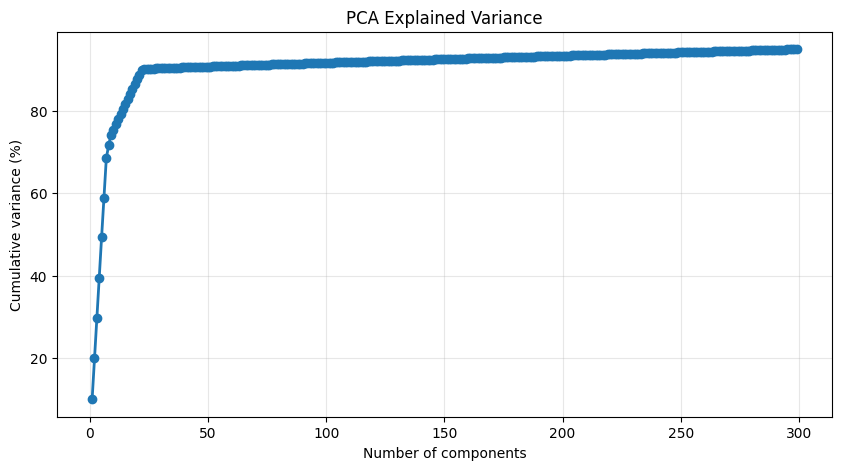

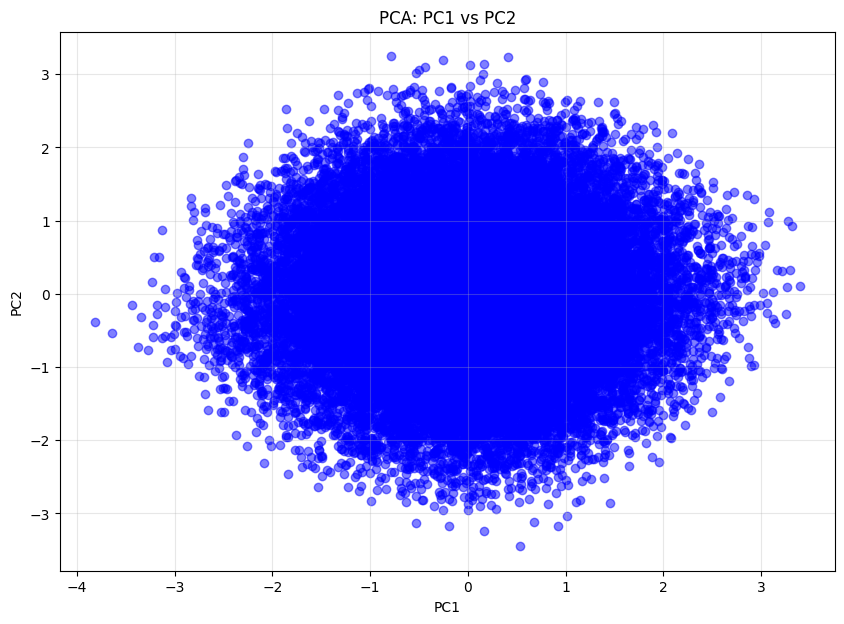


Top 10 features for PC1:
                                PC1       PC2
Gender_Diversity_%         0.492227 -0.567178
Median_Salary_USD          0.471717 -0.193009
Automation_Risk_%          0.447510  0.396536
Projected_Openings_2030    0.411850 -0.097999
Remote_Work_Ratio_%        0.308757  0.253954
Experience_Required_Years  0.259839  0.622697
Job_Openings_2024          0.048097 -0.147627
Job_Status_Increasing      0.003951  0.005381
AI_Impact_Level_Moderate   0.003493  0.005342
Location_Brazil            0.003383  0.000940
Data for PCA: 30000 rows x 665 features

Variance explained table:
  Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            1.018821                  9.97                   9.97
1      Dim2            1.011966                  9.90                  19.87
2      Dim3            1.005022                  9.83                  29.70
3      Dim4            1.002050                  9.80                  39.50
4      Dim5     

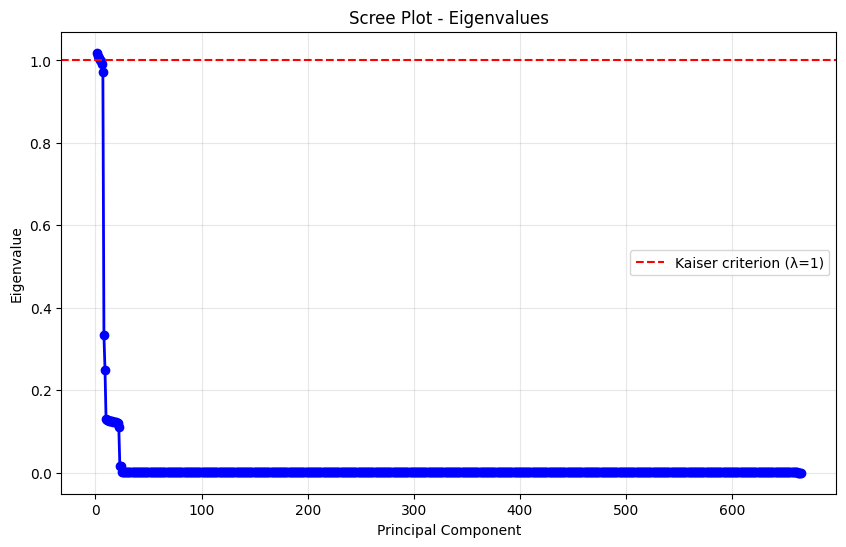


Top features for PC1:
                                PC1       PC2
Gender_Diversity_%         0.492227 -0.567178
Median_Salary_USD          0.471717 -0.193009
Automation_Risk_%          0.447510  0.396536
Projected_Openings_2030    0.411850 -0.097999
Remote_Work_Ratio_%        0.308757  0.253954
Experience_Required_Years  0.259839  0.622697
Job_Openings_2024          0.048097 -0.147627
Job_Status_Increasing      0.003951  0.005381
AI_Impact_Level_Moderate   0.003493  0.005342
Location_Brazil            0.003383  0.000940


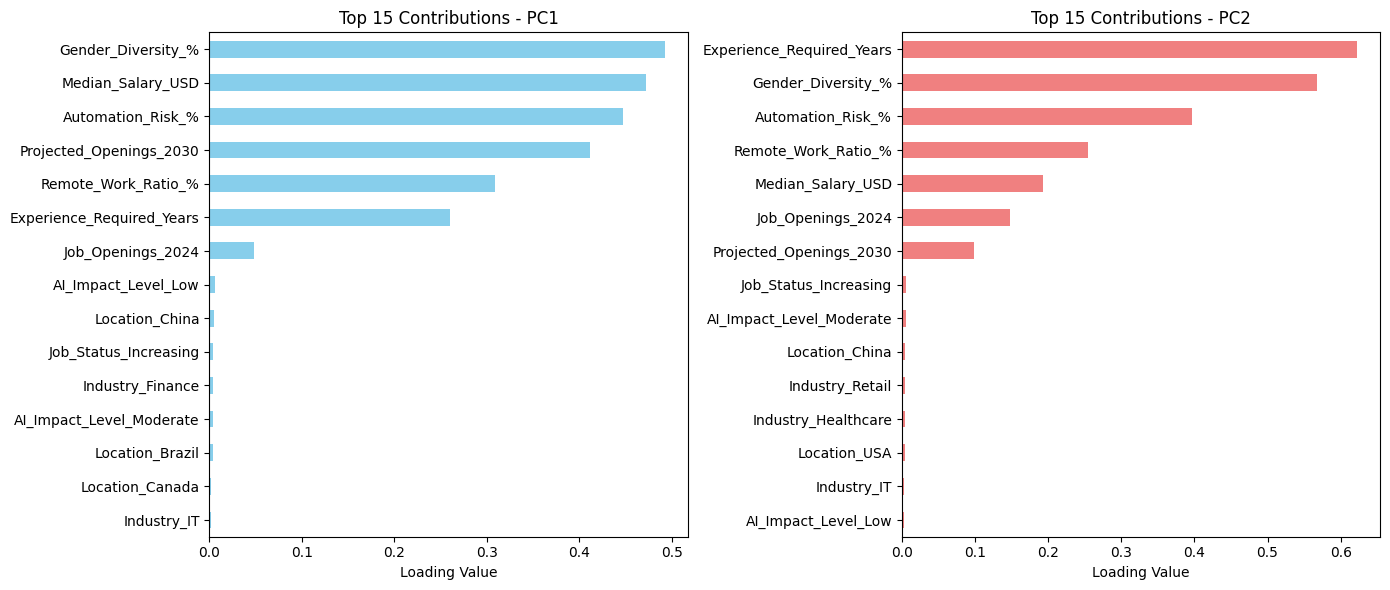

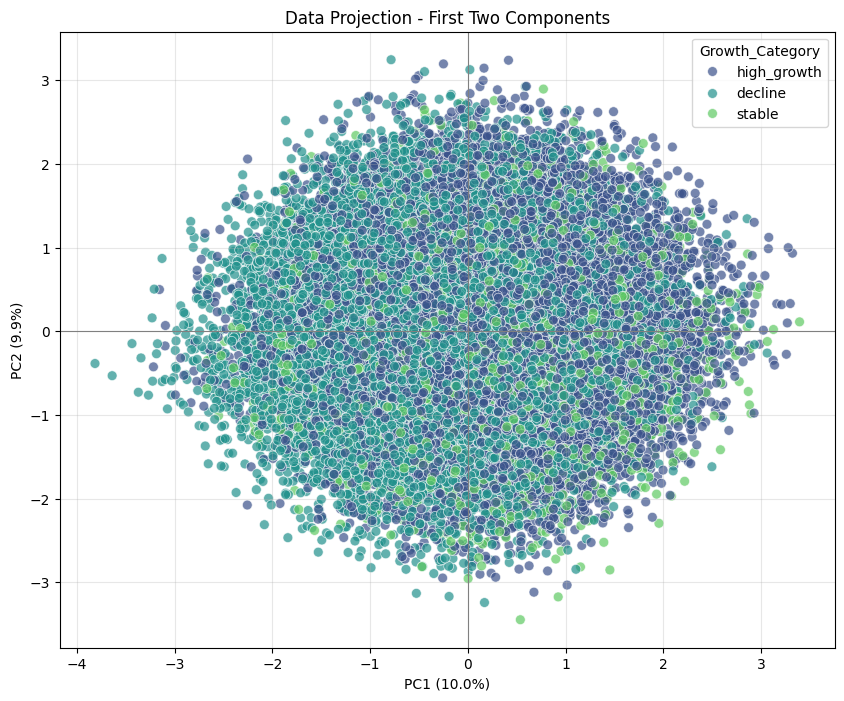

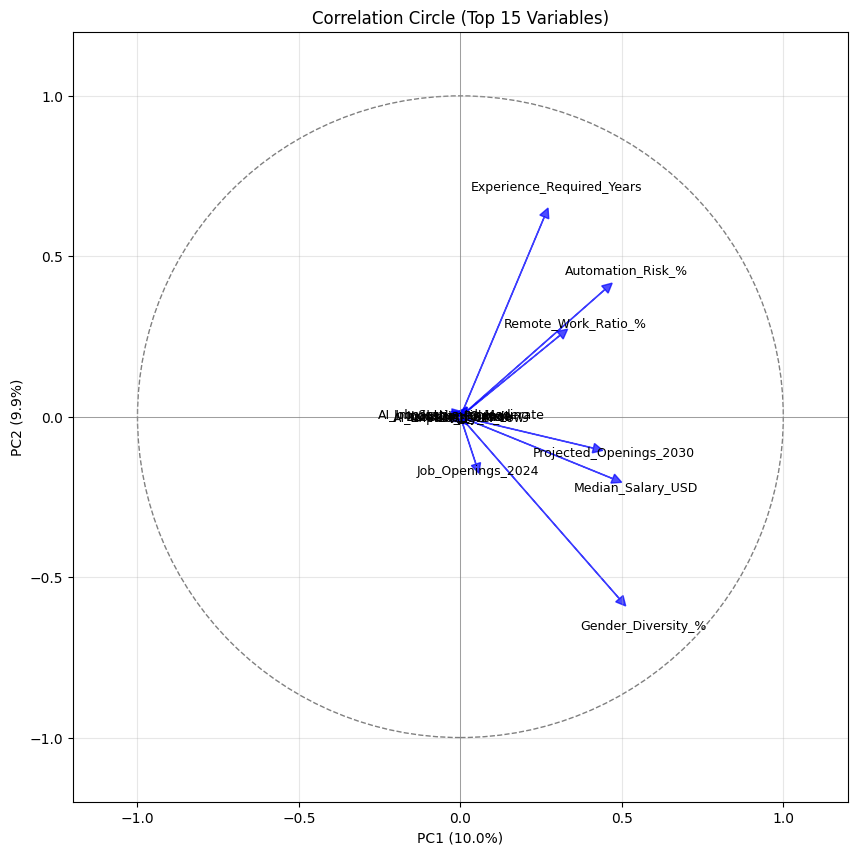

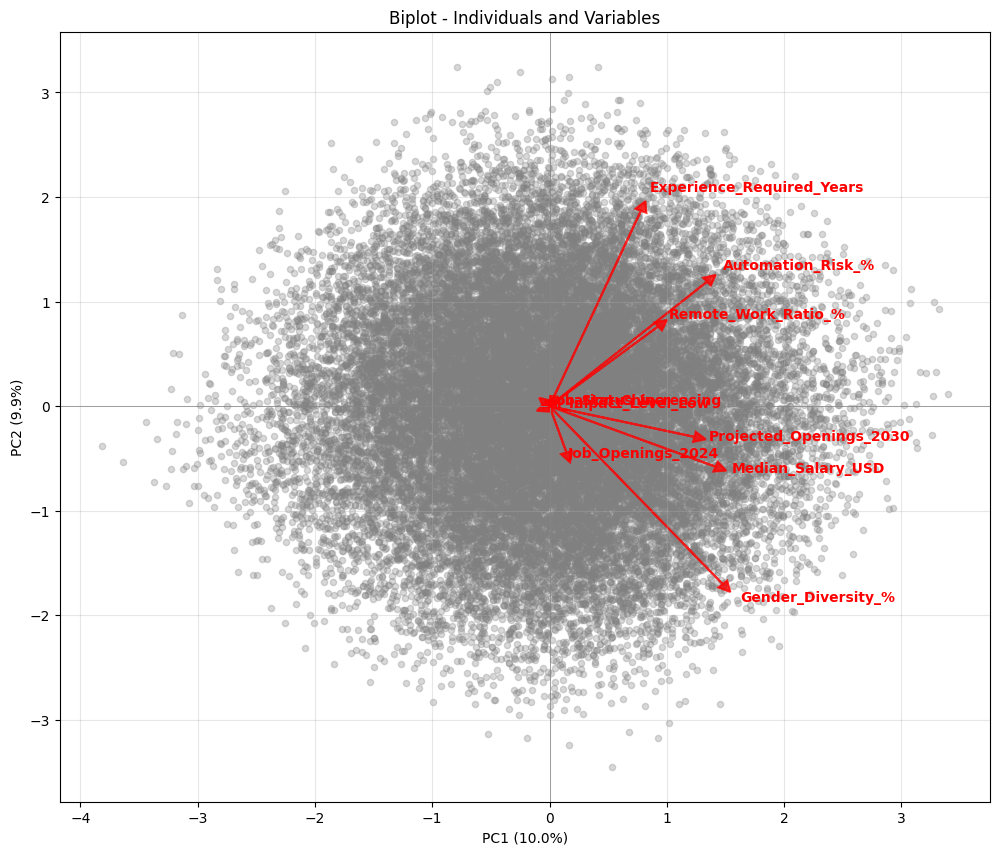


Recommended components: 4
Variance explained: 39.5%
Dataset saved: dataset_reduit.csv
FINAL PCA RESULTS
Simple PCA shape: (30000, 299)
Comprehensive PCA shape: (30000, 9)
Original features: 665
Reduction: 98.6%

Top features from Simple PCA:
                                PC1       PC2
Gender_Diversity_%         0.492227 -0.567178
Median_Salary_USD          0.471717 -0.193009
Automation_Risk_%          0.447510  0.396536
Projected_Openings_2030    0.411850 -0.097999
Remote_Work_Ratio_%        0.308757  0.253954
Experience_Required_Years  0.259839  0.622697
Job_Openings_2024          0.048097 -0.147627
Job_Status_Increasing      0.003951  0.005381

Final PCA Dataset:


PC1       PC2       PC3       PC4              Job_Title  \
0 -1.171058 -0.179163  0.968941 -1.481716     Investment analyst   
1  1.626458  0.149965 -1.242855 -1.082302  Journalist, newspaper   
2  0.419570  0.277766  0.350576  0.861145      Financial planner   
3  0.921450  0.144996 -1.728397  0.746368        Legal secretary   
4  0.565968 -0.544543  0.830676 -0.296741  Aeronautical engineer   

  Growth_Category  Automation_Risk_%   Location       Industry  
0     high_growth              28.28         UK             IT  
1     high_growth              89.71        USA  Manufacturing  
2         decline              72.97     Canada        Finance  
3         decline              99.94  Australia     Healthcare  
4     high_growth              37.65    Germany             IT

In [31]:
# **PCA ANALYSIS - ENHANCED WITH ALL VISUALS**
def simple_pca(df_ready, n_components=0.95):
 
    # 1. Keep only numeric columns
    df_numeric = df_ready.select_dtypes(include=[np.number]).fillna(0)
    print(f"Numeric features: {df_numeric.shape[1]}")
    
    # 2. Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df_numeric)
    
    # 3. Print variance explained
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    print(f"Variance explained: {cum_var[-1]*100:.2f}%")
    print(f"Components selected: {X_pca.shape[1]}")
    
    # 4. Scree plot / cumulative variance
    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(cum_var)+1), cum_var*100, marker='o', linewidth=2)
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative variance (%)')
    plt.title('PCA Explained Variance')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 5. Scatter plot first two PCs
    plt.figure(figsize=(10,7))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color='blue')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA: PC1 vs PC2')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 6. Feature contributions
    pca_features = pd.DataFrame(pca.components_[:2], 
                               columns=df_numeric.columns, 
                               index=['PC1','PC2']).T
    
    print("\nTop 10 features for PC1:")
    print(pca_features.sort_values(by='PC1', ascending=False).head(10))
    
    # 7. Return PCA-transformed dataset
    df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
    return df_pca, pca, pca_features

def comprehensive_pca_analysis(df_ready, df_engineered):

    # 1) Prepare data for PCA
    df_pca_input = df_ready.select_dtypes(include=[np.number]).fillna(0)
    X = df_pca_input.values
    feature_names = df_pca_input.columns.tolist()
    print(f"Data for PCA: {X.shape[0]} rows x {X.shape[1]} features")
    
    # 2) Apply PCA
    pca = PCA()
    pca_components = pca.fit_transform(X)
    
    # 3) Explained variance table
    explained_variance = pca.explained_variance_ratio_
    eig = pd.DataFrame({
        "Dimension": [f"Dim{i+1}" for i in range(len(explained_variance))],
        "Variance expliquée": pca.explained_variance_,
        "% variance expliquée": np.round(explained_variance * 100, 2),
        "% cum. var. expliquée": np.round(np.cumsum(explained_variance) * 100, 2)
    })
    print("\nVariance explained table:")
    print(eig.head(10))
    
    # 4) Scree plot with Kaiser criterion
    eigenvalues = pca.explained_variance_
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='b', linewidth=2)
    plt.axhline(y=1, color='r', linestyle='--', label='Kaiser criterion (λ=1)')
    plt.title("Scree Plot - Eigenvalues")
    plt.xlabel("Principal Component")
    plt.ylabel("Eigenvalue")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 5) Variable contributions (Loadings)
    pca_features_comprehensive = pd.DataFrame(pca.components_[:2], 
                                             columns=feature_names, 
                                             index=['PC1','PC2']).T
    
    print("\nTop features for PC1:")
    print(pca_features_comprehensive.sort_values(by='PC1', ascending=False).head(10))
    
    plt.figure(figsize=(14, 6))
    
    # PC1 contributions (top 15)
    plt.subplot(1, 2, 1)
    top_pc1 = pca_features_comprehensive['PC1'].abs().sort_values(ascending=False).head(15)
    top_pc1.sort_values().plot(kind='barh', color='skyblue')
    plt.title('Top 15 Contributions - PC1')
    plt.xlabel('Loading Value')
    
    # PC2 contributions (top 15)
    plt.subplot(1, 2, 2)
    top_pc2 = pca_features_comprehensive['PC2'].abs().sort_values(ascending=False).head(15)
    top_pc2.sort_values().plot(kind='barh', color='lightcoral')
    plt.title('Top 15 Contributions - PC2')
    plt.xlabel('Loading Value')
    
    plt.tight_layout()
    plt.show()
    
    # 6) Projection on first two principal components
    pca_df = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])
    
    # Add metadata for coloring if available
    metadata_options = ['Growth_Category', 'AI_Impact_Level', 'Industry']
    for meta in metadata_options:
        if meta in df_engineered.columns:
            pca_df[meta] = df_engineered[meta].values
            break
    
    plt.figure(figsize=(10, 8))
    if 'Growth_Category' in pca_df.columns:
        sns.scatterplot(x='PC1', y='PC2', hue='Growth_Category', data=pca_df, palette='viridis', s=50, alpha=0.7)
    else:
        sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.7)
    
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
    plt.title('Data Projection - First Two Components')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.axvline(0, color='grey', linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.show()
        
    # 7) Correlation circle (Cercle de corrélation)
    pcs = pca.components_
    plt.figure(figsize=(10, 10))
    
    # Add correlation circle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_artist(circle)
    plt.axhline(0, color='grey', linestyle='-', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='-', linewidth=0.5)
    
    # Plot top 15 variables for clarity
    loadings_df = pd.DataFrame(pcs.T[:, 0], index=feature_names, columns=['PC1'])
    top_vars = loadings_df['PC1'].abs().sort_values(ascending=False).head(15).index
    
    for var in top_vars:
        i = feature_names.index(var)
        plt.arrow(0, 0, pcs[0, i], pcs[1, i], 
                 head_width=0.03, head_length=0.03, color='blue', alpha=0.7)
        plt.text(pcs[0, i]*1.15, pcs[1, i]*1.15, var, 
                fontsize=9, ha='center', va='center')
    
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
    plt.title('Correlation Circle (Top 15 Variables)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 8) Biplot (Individuals + Variables)
    plt.figure(figsize=(12, 10))
    
    # Plot individuals
    scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], 
                         alpha=0.3, s=20, color='gray')
    
    # Plot variables (top 10)
    scale = 3
    top_vars_biplot = loadings_df['PC1'].abs().sort_values(ascending=False).head(10).index
    
    for var in top_vars_biplot:
        i = feature_names.index(var)
        plt.arrow(0, 0, pcs[0, i]*scale, pcs[1, i]*scale, 
                 head_width=0.1, head_length=0.1, color='red', alpha=0.8, linewidth=1.5)
        plt.text(pcs[0, i]*scale*1.1, pcs[1, i]*scale*1.1, var, 
                color='red', fontsize=10, fontweight='bold')
    
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
    plt.title('Biplot - Individuals and Variables')
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 9) Component selection and final dataset
    n_kaiser = (pca.explained_variance_ > 1).sum()
    n_85 = int(np.argmax(np.cumsum(explained_variance) >= 0.85) + 1)
    recommended = min(n_kaiser, n_85) if n_kaiser > 0 else n_85
    
    print(f"\nRecommended components: {recommended}")
    print(f"Variance explained: {np.cumsum(explained_variance)[recommended-1]*100:.1f}%")
    
    # Create final reduced dataset
    pca_reduced = pca_components[:, :recommended]
    reduced_cols = [f'PC{i+1}' for i in range(recommended)]
    dataset_reduit = pd.DataFrame(pca_reduced, columns=reduced_cols)
    
    # Add important metadata
    metadata_to_add = ['Job_Title', 'Growth_Category', 'Automation_Risk_%', 'Location', 'Industry']
    for meta in metadata_to_add:
        if meta in df_engineered.columns:
            dataset_reduit[meta] = df_engineered[meta].values
    
    # Save results
    dataset_reduit.to_csv(OUTPUT_PCA_CSV, index=False)
    print(f"Dataset saved: {OUTPUT_PCA_CSV}")
    
    return dataset_reduit, pca, pca_features_comprehensive

df_pca_simple, pca_simple, pca_features_simple = simple_pca(df_ready, n_components=0.95)
dataset_reduit, pca_model, pca_features_comprehensive = comprehensive_pca_analysis(df_ready, df_engineered)
print("FINAL PCA RESULTS")

print(f"Simple PCA shape: {df_pca_simple.shape}")
print(f"Comprehensive PCA shape: {dataset_reduit.shape}")
print(f"Original features: {df_ready.select_dtypes(include=[np.number]).shape[1]}")
reduction_pct = ((df_ready.select_dtypes(include=[np.number]).shape[1] - dataset_reduit.shape[1]) / df_ready.select_dtypes(include=[np.number]).shape[1] * 100)
print(f"Reduction: {reduction_pct:.1f}%")

print("\nTop features from Simple PCA:")
print(pca_features_simple.sort_values(by='PC1', ascending=False).head(8))

print("\nFinal PCA Dataset:")
dataset_reduit.head()

# **SVM**

PCA matrix shape: (30000, 299)
Target classes: ['decline' 'high_growth' 'stable']
Class counts: {'decline': 13398, 'high_growth': 13639, 'stable': 2963}
Baseline accuracy: 0.954
              precision    recall  f1-score   support

     decline       1.00      0.95      0.97      2680
 high_growth       1.00      0.96      0.98      2728
      stable       0.69      0.98      0.81       592

    accuracy                           0.95      6000
   macro avg       0.89      0.96      0.92      6000
weighted avg       0.97      0.95      0.96      6000



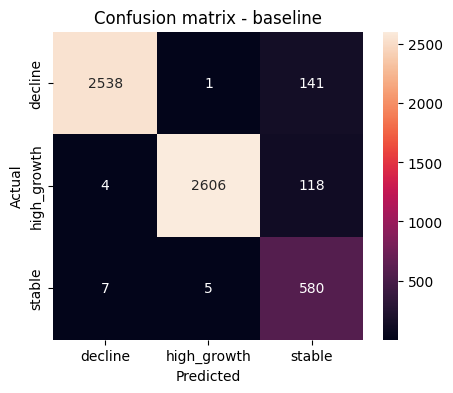

Baseline ROC AUC (macro, OVR): 0.9979


KeyboardInterrupt: 

In [ ]:


# 1) Obtain PCA matrix (robust to your notebook outputs)
def _get_pca_df():
    if 'df_pca_simple' in globals():
        return pd.DataFrame(df_pca_simple).copy()
    if 'dataset_reduit' in globals():
        dr = pd.DataFrame(dataset_reduit).copy()
        pc_cols = [c for c in dr.columns if str(c).startswith('PC')]
        if pc_cols:
            return dr[pc_cols].copy()
        return dr.select_dtypes(include=[np.number]).copy()
    if 'pca_model' in globals() and 'df_ready' in globals():
        df_num = df_ready.select_dtypes(include=[np.number]).fillna(0)
        arr = pca_model.transform(df_num)
        return pd.DataFrame(arr, columns=[f'PC{i+1}' for i in range(arr.shape[1])])
    if 'df_ready' in globals():
        # fallback: fit PCA quickly to keep pipeline runnable
        from sklearn.decomposition import PCA
        df_num = df_ready.select_dtypes(include=[np.number]).fillna(0)
        tmp = PCA(n_components=0.95, random_state=42)
        arr = tmp.fit_transform(df_num)
        return pd.DataFrame(arr, columns=[f'PC{i+1}' for i in range(arr.shape[1])])
    raise RuntimeError("No PCA output found. Ensure df_pca_simple, dataset_reduit, pca_model+df_ready or df_ready exist.")

X_pca = _get_pca_df().reset_index(drop=True)
svm_feature_names = list(X_pca.columns)
print("PCA matrix shape:", X_pca.shape)

# 2) Target: use your engineered Growth_Category (unchanged)
if 'df_engineered' not in globals():
    raise RuntimeError("df_engineered not found. Run feature_engineering earlier.")
if 'Growth_Category' not in df_engineered.columns:
    raise RuntimeError("df_engineered missing 'Growth_Category'.")

y_series = df_engineered['Growth_Category'].astype(str).reset_index(drop=True)
if len(y_series) != len(X_pca):
    raise RuntimeError(f"Row count mismatch: X_pca={len(X_pca)} vs df_engineered={len(y_series)}. Align row order before continuing.")

le_target = LabelEncoder()
y = le_target.fit_transform(y_series)
print("Target classes:", le_target.classes_)
unique, counts = np.unique(y, return_counts=True)
print("Class counts:", dict(zip(le_target.inverse_transform(unique), counts)))

# 3) Train/test split (use stratify when every class has >=2 samples)
stratify_arg = y if np.all(counts >= 2) else None
if stratify_arg is None:
    print("Warning: Some classes have <2 samples. Splitting without stratify.")
X = X_pca.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_arg
)

# 4) Fit baseline SVM (probabilities enabled)
svm_clf = SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# 5) Baseline evaluation
y_pred = svm_clf.predict(X_test)
print("Baseline accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred, target_names=le_target.classes_))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title('Confusion matrix - baseline')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()

# 6) Multiclass ROC AUC (OVR) if probabilities available
if hasattr(svm_clf, "predict_proba"):
    probas = svm_clf.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=np.arange(len(le_target.classes_)))
    try:
        roc_auc = roc_auc_score(y_test_bin, probas, average='macro', multi_class='ovr')
        print("Baseline ROC AUC (macro, OVR):", round(roc_auc, 4))
    except Exception as e:
        print("ROC AUC not computed:", e)

# 7) Permutation importance on PCA components (interpretable as component importance)
X_test_df = pd.DataFrame(X_test, columns=svm_feature_names)
perm = permutation_importance(svm_clf, X_test_df, y_test, n_repeats=10, random_state=42, n_jobs=-1)
idx = np.argsort(perm.importances_mean)[::-1]
print("Top PCA components by permutation importance:")
for i in idx[:10]:
    print(f"{svm_feature_names[i]}: {perm.importances_mean[i]:.4f} ± {perm.importances_std[i]:.4f}")

# 8) GridSearch with f1_macro (better for class imbalance)
param_grid = {'C':[0.1,1,10], 'kernel':['linear','rbf'], 'gamma':['scale','auto']}
grid = GridSearchCV(SVC(class_weight='balanced', probability=True, random_state=42),
                    param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)
best = grid.best_estimator_
print("GridSearch best params:", grid.best_params_)
print("CV best score (f1_macro):", round(grid.best_score_, 4))

# 9) Evaluate best estimator on test
y_pred_best = best.predict(X_test)
print("Best estimator accuracy:", round(accuracy_score(y_test, y_pred_best), 4))
print(classification_report(y_test, y_pred_best, target_names=le_target.classes_))
cm2 = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title('Confusion matrix - best estimator'); plt.show()

# 10) Save model and encoders
joblib.dump({'model': best, 'label_encoder': le_target, 'pca_feature_names': svm_feature_names}, "svm_after_pca.joblib")
print("Saved: svm_after_pca.joblib")
